매우 간단하게 EDA를 진행하는 것

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

(array([1.940e+02, 1.965e+03, 5.678e+03, 2.332e+03, 1.770e+03, 4.650e+02,
        7.400e+01, 1.300e+01, 8.000e+00, 1.000e+00]),
 array([-1.771 ,  1.4821,  4.7352,  7.9883, 11.2414, 14.4945, 17.7476,
        21.0007, 24.2538, 27.5069, 30.76  ]),
 <BarContainer object of 10 artists>)

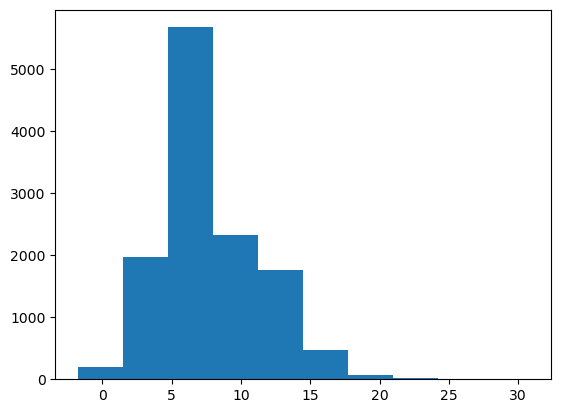

In [2]:
data = np.loadtxt("dataset.txt")
plt.hist(data)

# Measure of Centrality
- Mean
- Median
- Mode

### Mean
$ \frac{1}{N} \sum_{i=1}^N x_i $


In [4]:
# mean을 구하는 함수를 직접 만든다면
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed/len(xs)

print(get_mean([3,5,2,6]))

4.0


In [6]:
# numpy mean 사용, 3가지 다른 방법
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


### Median

In [7]:
# 중앙값

def get_median(xs):
    mid = len(xs)//2 # 가운데 위치를 지정(중앙이 어디인지)
    if len(xs)%2 == 1: # 데이터의 갯수가 홀수이면,
        return sorted(xs)[mid] # 가운데 위치(mid)를 불러오기
    else :  # 데이터의 갯수가 짝수이면,
        return 0.5*np.sum(sorted(xs)[mid-1:mid+1]) # mid-1, mid+1의 평균 불러오기
    
print(get_median([7,7,3,1,4,5]))

4.5


In [8]:
median = np.median(data)
print(median)

6.7325


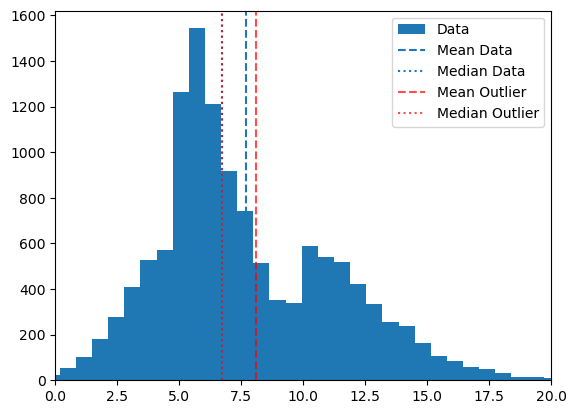

In [9]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

- 이상치나 불량 데이터를 신경 쓴다면 평균값 데이터는 이상치에 민감하지만
- 중앙값은 그렇지 않음

### Mode (최빈값)

In [11]:
# 직접 만들기
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True) # 고유한 값을 찾고(=values), 그 값이 몇 번 등장했는지(=counts)
    max_count_index = np.argmax(counts) # 위에서 정의한 counts에서 가장 큰 값을 index로 반환
    return values[max_count_index] # values 중에서 counts가 가장 큰 값인 index를 반환, 즉 최빈값

print(get_mode([1,7,2,5,3,3,8,3,2]))

3


In [12]:
mode = st.mode(data)
print(mode)

ModeResult(mode=5.519, count=9)


In [14]:
hist, edges = np.histogram(data, bins=100) # data를 histogram으로 만드는데, 이때 hist는 각 구간에 속하는 데이터의 개수, edges는 각 구간의 경계값
edge_centers = 0.5*(edges[1:]+edges[:-1]) # 각 구간의 경계값의 평균(왼쪽, 오른쪽 경계값)
mode = edge_centers[hist.argmax()] 
print(mode)

5.223165


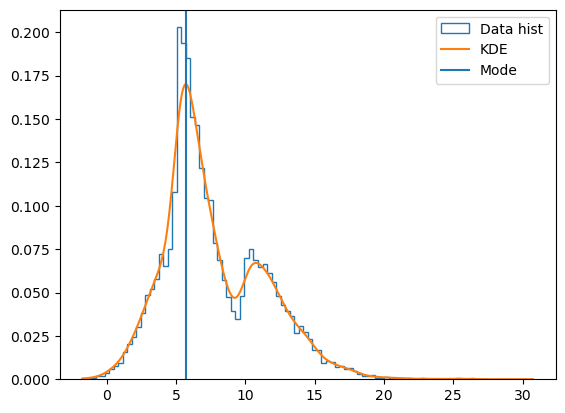

In [ ]:
kde = st.gaussian_kde(data) # data의 커널 밀도 추정
xvals = np.linspace(data.min(), data.max(), 1000) # 지정된 범위에서 균등하게 분포된 값을 생성, kde 곡선을 도출하기 위해
yvals = kde(xvals) # x values에서의 kde 값을 y values로 반환
mode = xvals[yvals.argmax()]
plt.hist(data, bins=100, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend()

# Measures of width and balance
- Variance
- Standard Deviatino
- Skewness
- Kurtosis

### Variance

$ Var = \frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2, $


In [18]:
# variance 구하는 함수 직접
def get_variance(xs):
    mean = np.mean(xs)
    summed = 0
    for x in xs:
        summed += (x-mean)**2
    return summed / (len(xs)-1)

print(get_variance([1,2,3,4,5]))

2.5


In [23]:
variance = np.var([1,2,3,4,5])
print(variance)

2.0


In [ ]:
variance = np.var([1,2,3,4,5], ddof=1) # 자유도를 어떻게 주느냐에 따라 달라짐, N-1로 나눌지, N으로 나눌지
print(variance)

2.5


### Standard Deviation

In [24]:
std =np.std(data)
print(std, std**2)

3.6244414221454435 13.136575622563685


### Combined

Text(0, 0.5, 'Probability')

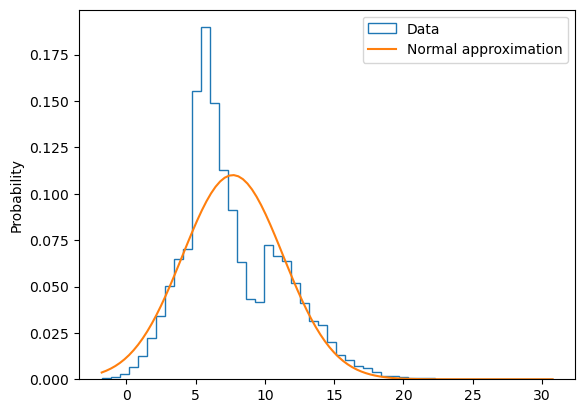

In [26]:
xs = np.linspace(data.min(), data.max(), 100)
ys = st.norm.pdf(xs, loc=mean, scale=std) # 위치는 mean(평균), 범위는 std(표준편차)인 확률 밀도 함수

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys, label="Normal approximation")
plt.legend()
plt.ylabel("Probability")

### Skewness

$ \gamma_1 = \frac{\kappa_3}{\kappa_2^{3/2}} = \frac{E[(x-\mu)^3]}{E[(x-\mu)^2]^{3/2}} $

In [27]:
# 직접 구하기
def get_skewness(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**3
    return (summed / (len(xs))) / (var ** 1.5)
print(get_skewness([1,2,3,4,5]))

0.0


In [28]:
skewness = st.skew(data)
print(skewness, get_skewness(data))

0.7408773663373577 0.7408773663373582


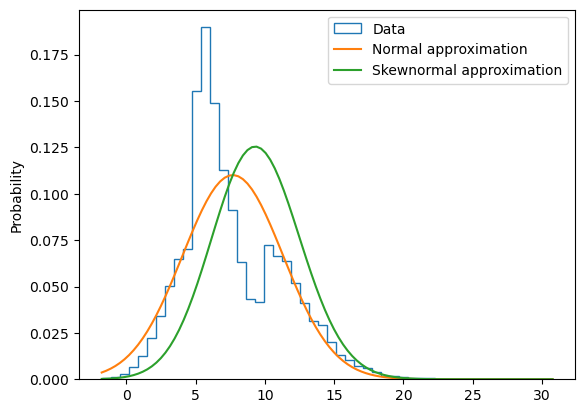

In [29]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ys2 = st.skewnorm.pdf(xs, skewness, loc=mean, scale=std)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

Skewnormal 근사가 정확하지 않음,
그래서 적합하게 맞추어 주는 과정 필요

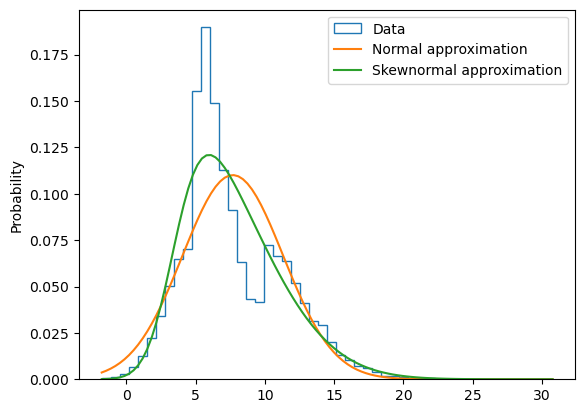

In [30]:
xs = np.linspace(data.min(), data.max(), 100)
ys1 = st.norm.pdf(xs, loc=mean, scale=std)
ps = st.skewnorm.fit(data)
ys2 = st.skewnorm.pdf(xs, *ps)

plt.hist(data, bins=50, density=True, histtype="step", label="Data")
plt.plot(xs, ys1, label="Normal approximation")
plt.plot(xs, ys2, label="Skewnormal approximation")
plt.legend()
plt.ylabel("Probability");

### Kurtosis

$ \kappa = \frac{E[(x-\mu)^4]}{E[(x-\mu)^2]^{4/2}} $

In [ ]:
def get_kurtosis(xs):
    mean = np.mean(xs)
    var = np.var(xs)
    summed = 0
    for x in xs:
        summed += (x - mean)**4
    return (summed / (len(xs))) / (var ** 2)
print(get_kurtosis([1,2,3,4,5]))

1.7


In [32]:
kurtosis = st.kurtosis(data)
print(kurtosis, get_kurtosis(data))

0.5517538497309498 3.551753849730955


In [34]:
kurtosis = st.kurtosis(data, fisher=False) # Fisher는 첨도를 정규화하는 방법, 정규분포에 대해 첨도를 구하면 3의 첨도를 얻게 됨, scipy에서 fisher = 3 설정하면 추가 보정
print(kurtosis, get_kurtosis(data))

3.5517538497309498 3.551753849730955


### Percentiles

Text(0, 0.5, 'Percentile')

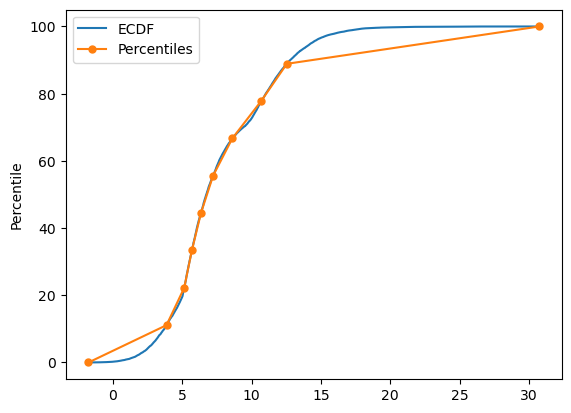

In [36]:
ps = np.linspace(0,100,10)
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys*100, label ="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker = ".", ms=10)
plt.legend()
plt.ylabel("Percentile")

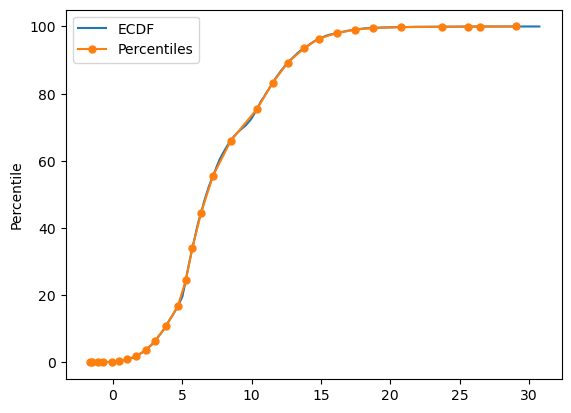

In [37]:
ps = 100 * st.norm.cdf(np.linspace(-4, 4, 30))
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

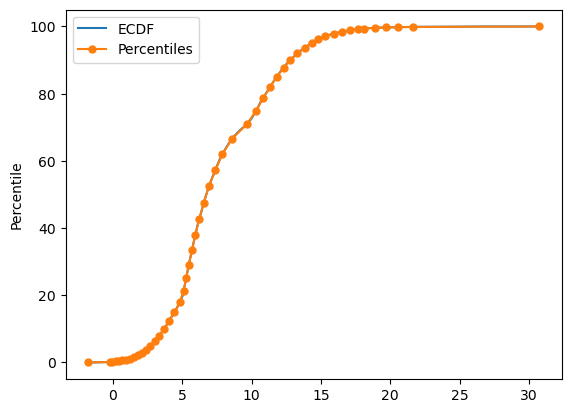

In [ ]:
ps = 100 * st.norm.cdf(np.linspace(-3, 3, 50))
ps = np.concatenate(([0], ps, [100]))  
x_p = np.percentile(data, ps)

xs = np.sort(data)
ys = np.linspace(0, 1, len(data))

plt.plot(xs, ys * 100, label="ECDF")
plt.plot(x_p, ps, label="Percentiles", marker=".", ms=10)
plt.legend()
plt.ylabel("Percentile");

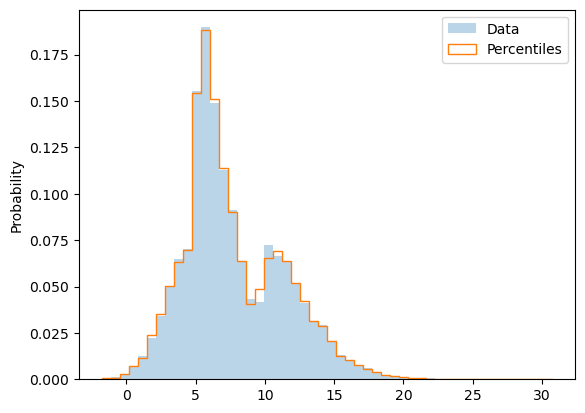

In [43]:
from scipy.interpolate import interp1d

n = int(1e6)
u = np.random.uniform(size=n)
samp_percentile_1 = interp1d(ps / 100, x_p)(u)

_, bins, _ = plt.hist(data, bins=50, density=True, alpha=0.3, label="Data")
plt.hist(samp_percentile_1, bins=bins, density=True, histtype="step", label="Percentiles")
plt.ylabel("Probability")
plt.legend();